In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# disable chained assignments, to remove the error of SettingWithCopyWarning .
pd.options.mode.chained_assignment = None 

In [3]:
marketing_df = pd.read_csv('./marketing_cva_f.csv')

In [4]:
marketing_df.head()

,Customer,State,CLV,Coverage,Income,loc_type,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,BU79786,Washington,2763.519279,Basic,56274,Suburban,69,32,5,384.811147,Two-Door Car,40.696695
1,AI49188,Nevada,12887.431650,Premium,48767,Suburban,108,18,38,566.472247,Two-Door Car,48.755298
2,HB64268,Washington,2813.692575,Basic,43836,Rural,73,12,44,138.130879,Four-Door Car,70.394474
3,OC83172,Oregon,8256.297800,Basic,62902,Rural,69,14,94,159.383042,Two-Door Car,53.460212
4,XZ87318,Oregon,5380.898636,Basic,55350,Suburban,67,0,13,321.600000,Four-Door Car,32.811507


In [5]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       6817 non-null   object 
 1   State                          6817 non-null   object 
 2   CLV                            6817 non-null   float64
 3   Coverage                       6817 non-null   object 
 4   Income                         6817 non-null   int64  
 5   loc_type                       6817 non-null   object 
 6   monthly_premium                6817 non-null   int64  
 7   months_last_claim              6817 non-null   int64  
 8   Months_Since_Policy_Inception  6817 non-null   int64  
 9   Total_Claim_Amount             6817 non-null   float64
 10  Vehicle_Class                  6817 non-null   object 
 11  avg_vehicle_age                6817 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage:

In [6]:
### lets do only for numerical columns.

In [7]:
marketing_numeric=marketing_df.select_dtypes(include=np.number)

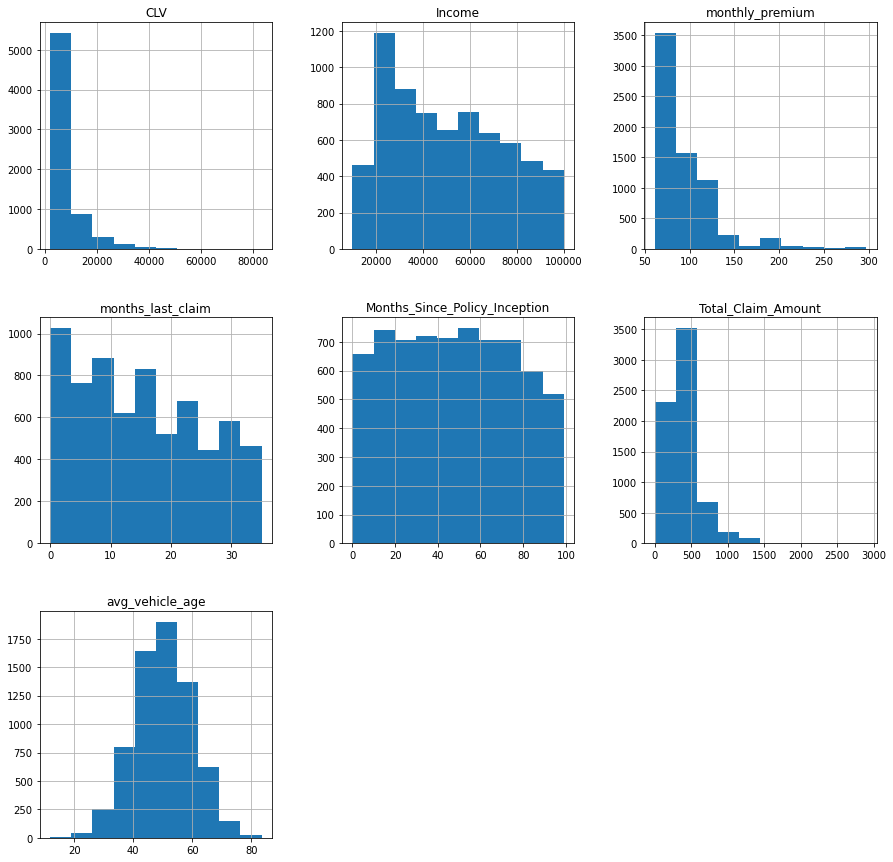

In [8]:
marketing_numeric.hist(figsize=(15,15))  ## even if you give original df also , hist will any way plot for numeric only.
plt.show()

In [9]:
### lets plot the histogram and QQ-side by side
# histogram and Q-Q plots

def check_normality(df, column_name):  
    plt.figure(figsize=(15,6))
    #sub_plot 1 for histogram
    plt.subplot(1, 2, 1)
    df[column_name].hist(bins=25)
    #sub_plot 2 for qq plot from scipy stat
    plt.subplot(1, 2, 2)
    stats.probplot(df[column_name], dist="norm", plot=plt)
    plt.show()

In [10]:
marketing_numeric.columns

Index(['CLV', 'Income', 'monthly_premium', 'months_last_claim',
       'Months_Since_Policy_Inception', 'Total_Claim_Amount',
       'avg_vehicle_age'],
      dtype='object')

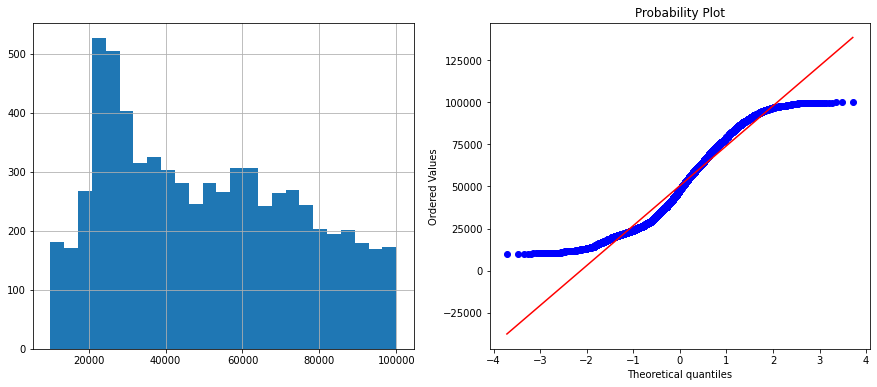

In [11]:
#example 

check_normality(marketing_numeric, 'Income')

## logarithmic - without sklearn

In [12]:
marketing_numeric.loc[:,'Income_log']=np.log(marketing_numeric['Income'])

In [13]:
marketing_numeric.head(2)  # new column

,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age,Income_log
0,2763.519279,56274,69,32,5,384.811147,40.696695,10.937988
1,12887.431650,48767,108,18,38,566.472247,48.755298,10.794809


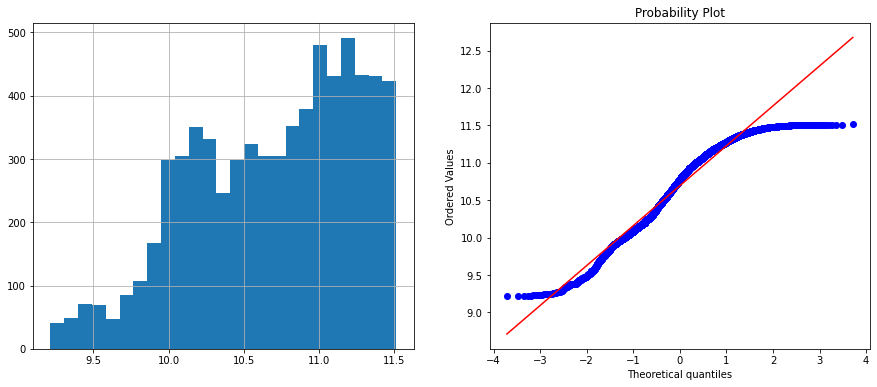

In [14]:
check_normality(marketing_numeric, 'Income_log')  ### not much has been done.

### Reciprocal transformation

In [15]:
marketing_numeric.loc[:,'Income_reciprocal']= 1 /marketing_numeric['Income']

In [16]:
marketing_numeric.head(2)

,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age,Income_log,Income_reciprocal
0,2763.519279,56274,69,32,5,384.811147,40.696695,10.937988,0.000018
1,12887.431650,48767,108,18,38,566.472247,48.755298,10.794809,0.000021


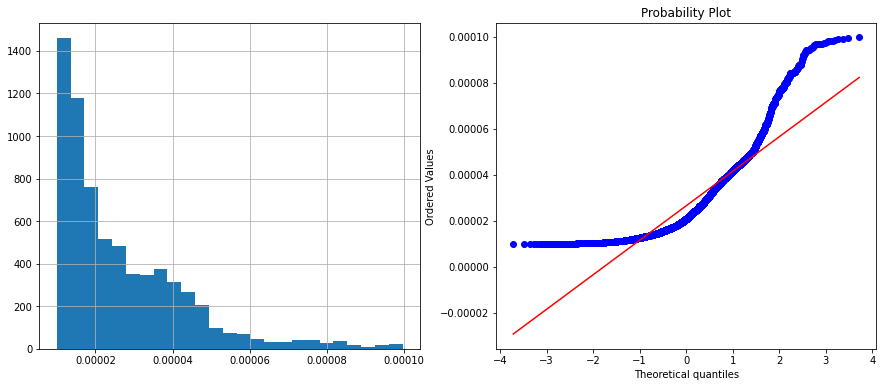

In [17]:
check_normality(marketing_numeric, 'Income_reciprocal')  ### vey bad...see here.

## Square root transformation

In [18]:
marketing_numeric.loc[:,'Income_sqrt']= marketing_numeric['Income']**(1/1.5)

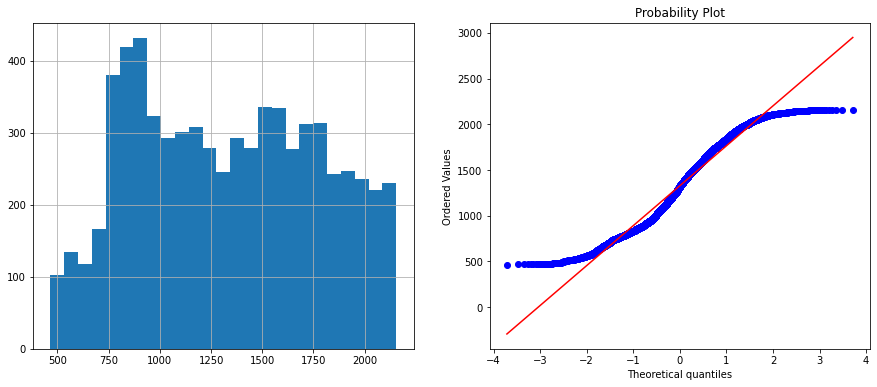

In [19]:
check_normality(marketing_numeric, 'Income_sqrt')  ### not good.. this is also bad..

## Box-Cox transformation

Optimal λ:  0.44437538279540056


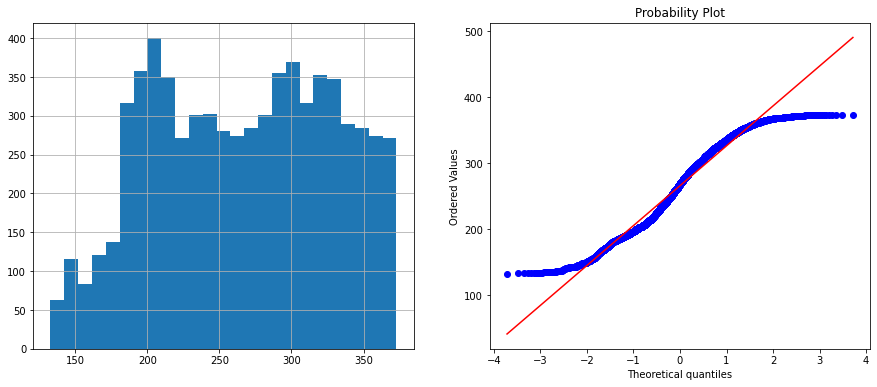

In [20]:
marketing_numeric.loc[:,'Income_boxcox'], param = stats.boxcox(marketing_numeric['Income']) 
print('Optimal λ: ', param)


check_normality(marketing_numeric, 'Income_boxcox')

### Yeo-Johnson

In [21]:
marketing_numeric.loc[:,'Income_yeojohnson'], param = stats.yeojohnson(marketing_numeric['Income']) 
print('Optimal λ: ', param)


Optimal λ:  0.44436578851948233


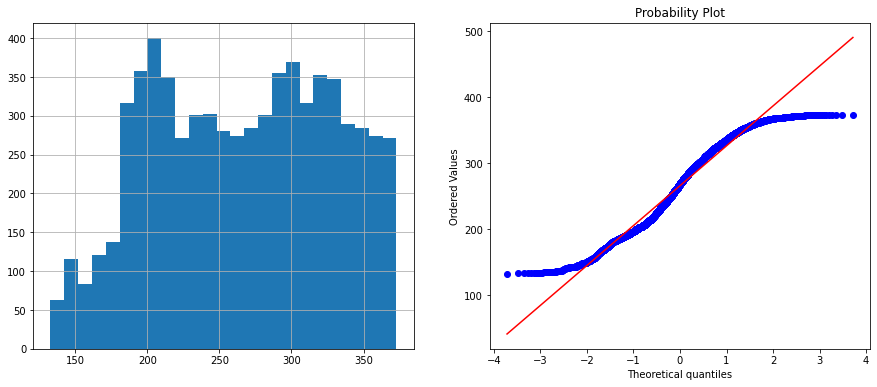

In [22]:
check_normality(marketing_numeric, 'Income_yeojohnson')